# Задание 7. Интерполяционный полином

Пусть $m=10$.   
1). Сгенерируйте случайный вектор $x_1, \dots,x_m$, равномерно распределенный на отрезке $[-1;1]$.   
2). Упорядочите его по возрастанию.   
3). Сгенерируйте случайный нормально распределенный вектор $y_1,\dots,y_m$.   
4). Вычислите интерполяционный полином $p$ по заданным узлам и значениям.   
5). Постройте график интерполяционного полинома p на отрезке $[-1,1;1,1]$. Исходные точки $(x_i,y_i)$ отметьте звёздочками.   
6). Вычислите и отметьте на графике кружками значения интерполяционного полинома в серединах между узлами.   

In [34]:
import numpy as np

m = 10
xs = np.random.uniform(-1.0, 1.0, size=(m,))
xs = np.sort(xs)
ys = np.random.normal(size=(m,))

def interpolateLagrangePoly(pt, xs, ys):
    value = 0.0
    for i, x_i in enumerate(xs):
        term = ys[i]
        for j, x_j in enumerate(xs):
            if j <> i:
                term *= (pt - x_j)
                term /= (x_i- x_j)
        value += term
    return value

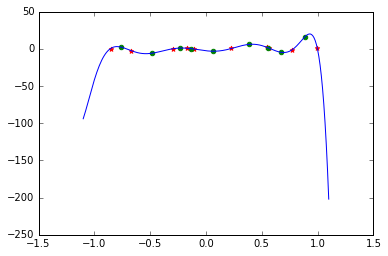

In [35]:
import matplotlib.pyplot as plt

x_range = np.linspace(-1.1, 1.1, 200)
vals = [interpolateLagrangePoly(p, xs, ys) for p in x_range]

testpts = []
for i, _ in list(enumerate(xs))[:-1]:
    testpts.append(0.5*(xs[i]+xs[i+1]))
testvals = [interpolateLagrangePoly(pt, xs, ys) for pt in testpts]

Xs = np.append(x_range, xs)
Ys = np.append(vals, ys)
Xs = np.append(Xs, testpts)
Ys = np.append(Ys, testvals)

Xs, Ys = zip(*sorted(zip(Xs, Ys), key=lambda XX: XX[0]))

plt.scatter(xs, ys, marker='*',color='red')
plt.scatter(testpts, testvals, color='green')
plt.plot(Xs, Ys, color='blue')

# Задание 8. Приближение функций интерполяционными полиномами

Задана функция $f(x)$ на отрезке $[a,b]$. 

А) Для $n = 2^1,2^2,2^3,\dots,2^{10}$ постройте полином $P_n$ степени $n$, интерполирующий функцию $f$ на отрезке $[a,b]$ в равноотстоящих узлах.

Б) Постройте в одних осях графики исходной функции и всех интерполяционных полиномов $P_n$ на отрезке $[a;b]$. 

В) Составьте таблицу погрешностей для $\|P_n-f\|_{\infty}$ и $\|P_n-f\|_2$, $n = 2^1,2^2,2^3,\dots,2^{10}$ на отрезке $[a;b]$

Г) Постройте в одних осях графики погрешностей $\|P_n-f\|_{\infty}$ и $\|P_n-f\|_2$, $n = 2^1,2^2,2^3,\dots,2^{10}$. 

$$f(x) = \frac{\sin{x}}{x^2+1}$$
$$a = -2, \; b = 2$$

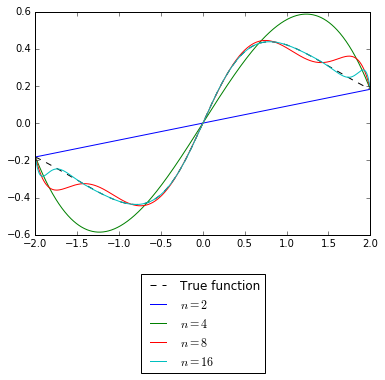

In [3]:
import scipy as sp
from scipy import interpolate

nodes_count = [2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10]

test_range = np.linspace(-2, 2.0, 1001)
test_vals = [np.sin(z)/(z**2+1) for z in test_range]

plt.plot(test_range, test_vals, 'k--', label='True function')

for nc in nodes_count[0:4]:
    app_xs = np.linspace(-2, 2.0, nc)
    vals = [np.sin(z)/(z**2+1) for z in app_xs]
    interpolator = interpolate.BarycentricInterpolator(app_xs, vals)
    app_ys = interpolator(test_range)
    plt.plot(test_range, app_ys, label='$n = {}$'.format(nc))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))

/projects/sage/sage-7.3/local/lib/python2.7/site-packages/scipy/interpolate/polyint.py:610: RuntimeWarning: divide by zero encountered in true_divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]


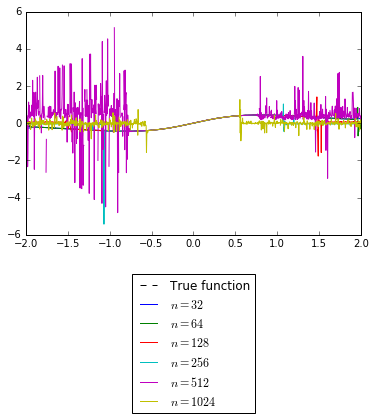

In [4]:
nodes_count = [2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10]

test_range = np.linspace(-2, 2.0, 1001)
test_vals = [np.sin(z)/(z**2+1) for z in test_range]

plt.plot(test_range, test_vals, 'k--', label='True function')

for nc in nodes_count[4:]:
    app_xs = np.linspace(-2, 2.0, nc)
    vals = [np.sin(z)/(z**2+1) for z in app_xs]
    interpolator = interpolate.BarycentricInterpolator(app_xs, vals)
    app_ys = interpolator(test_range)
    plt.plot(test_range, app_ys, label='$n = {}$'.format(nc))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))

In [118]:
import scipy as sp
from scipy import interpolate
import numpy.linalg as LA

nodes_count = [2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10]

test_range = np.linspace(-2, 2.0, 1001)
test_vals = [np.sin(z)/(z**2+1) for z in test_range]

square_error=[]
infty_error= []

# compute error
for nc in nodes_count:
    app_xs = np.linspace(-2, 2.0, nc)
    vals = [np.sin(z)/(z**2+1) for z in app_xs]
    interpolator = interpolate.BarycentricInterpolator(app_xs, vals)
    app_ys = interpolator(test_range)
    err = test_vals - app_ys
    square_error.append(LA.norm(err))
    infty_error.append(LA.norm(err, ord=np.inf))

table = '| $n$ |' +' | '.join([str(nc) for nc in nodes_count[:5]]) + \
' |\n' + '| - |' +'|'.join([' - ' for nc in nodes_count[:5]]) + \
'|\n' + '| $\|P_n - f\|_2$ |' +' | '.join(['{:.1e}'.format(e) for e in square_error[:5]]) + \
' |\n'+'| $\|P_n - f\|_{\infty}$ |' +' | '.join(['{:.1e}'.format(e) for e in infty_error[:5]]) + ' | '

from IPython.display import Markdown, display

display(Markdown(table))

| $n$ |2 | 4 | 8 | 16 | 32 |
| - | - | - | - | - | - |
| $\|P_n - f\|_2$ |7.9e+00 | 4.4e+00 | 1.5e+00 | 6.4e-01 | 3.8e-01 |
| $\|P_n - f\|_{\infty}$ |3.7e-01 | 2.4e-01 | 1.3e-01 | 8.6e-02 | 7.8e-02 | 

In [119]:
table = '| $n$ |' +' | '.join([str(nc) for nc in nodes_count[5:]]) + \
' |\n' + '| - |' +'|'.join([' - ' for nc in nodes_count[5:]]) + \
'|\n' + '| $\|P_n - f\|_2$ |' +' | '.join(['{:.1e}'.format(e) for e in square_error[5:]]) + \
' |\n'+'| $\|P_n - f\|_{\infty}$ |' +' | '.join(['{:.1e}'.format(e) for e in infty_error[5:]]) + ' | '

from IPython.display import Markdown, display

display(Markdown(table))

| $n$ |64 | 128 | 256 | 512 | 1024 |
| - | - | - | - | - | - |
| $\|P_n - f\|_2$ |1.6e+00 | 5.3e+00 | 8.4e+00 | inf | inf |
| $\|P_n - f\|_{\infty}$ |8.8e-01 | 2.1e+00 | 5.0e+00 | inf | inf | 

Бесконечные значения, возникающие в последних столбцах, связаны с проблемами деления на очень маленькие числа, если тестовая точка находится достаточно близко к узлам интерполяции. 

# Задание 9. Численное дифференцирование

А) Согласно варианту выберите отрезок $[a,b]$ и функцию $f(x)$ на нем.

Б) Вычислите производные $f'(x)$ и $f''(x)$ функции $f(x)$ точно (руками).

В) Задайте на отрезке $[a,b]$ равномерную сетку точек $a=x_0, x_1, \dots , x_n=b$, где $n=1000$.

Г) Для шагов $h = 10^{-1},\; 10^{-2}, \dots , 10^{-20}$ в каждой точке $x=x_i$ заданной сетки численно найдите приближенное значение производной $f'(x)$ по формулам $f'(x) \approx \frac{f(x+h)-f(x)}{h} = f'_{\rm fwd}(x)$ (формула дифференцирования вперед) и $f'(x) \approx \frac{f(x+h)-f(x-h)}{2h} = f'_{\rm cnt}(x)$ (формула центральной производной).

Д) Для найденных приближ. значений производных составьте таблицу погрешностей $M_{1, {\rm fwd}}(h) = \max\limits_{1\leqslant i \leqslant n-1} \vert f'(x_i) - f'_{\rm fwd}(x_i) \vert$ и $M_{1, {\rm cnt}} = \max\limits_{1\leqslant i \leqslant n-1} \vert f'(x_i) - f'_{\rm cnt}(x_i) \vert$: 

|$h$| $10^{-1}$| $10^{-2}$| … |$10^{-20}$|
|-|-----|-----|---|-----|
| $M_{1,{\rm fwd}}(h)$ | ... | ... | ... | ... |
| $M_{1,{\rm cnt}}(h)$ | ... | ... | ... | ... |


Д) Нарисуйте на одном рисунке графики $M_{1, {\rm fwd}}(h)$ и $M_{1, {\rm cnt}}(h)$ в зависимости от $h$ (в логарифмической шкале по обеим осям).

Е) Найдите значения приращений $h_{\rm fwd}$ и $h_{\rm cnt}$, при которых дают минимальную погрешность формула дифференцирования вперед и, соответственно, формула центральной производной.

Ж) Для шагов $h = 10^{-1}, 10^{-2}, \dots , 10^{-20}$ в каждой точке $x=x_i$ заданной сетки численно найдите приближенное значение второй производной $f''(x)$ по формуле
$f''(x) \approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2} = f''_{\rm cnt}(x)$
(формула центральной второй производной).

З) Для найденных приближ. значений производных составьте таблицу погрешностей $M_{2, {\rm cnt}} = \max\limits_{1\leqslant i \leqslant n-1} \vert f''(x_i) - f''_{\rm cnt}(x_i) \vert$ :

|$h$| $10^{-1}$| $10^{-2}$| … |$10^{-20}$|
|-|-----|-----|---|-----|
| $M_{2,{\rm cnt}}(h)$ | ... | ... | ... | ... |

И) Нарисуйте график $M_{2, {\rm cnt}}(h)$ в зависимости от $h$ (в логарифмической шкале по обеим осям).

К) Найдите значение приращения $h_{\rm cnt}$ , при котором формула центральной производной даёт минимальную погрешность. 

# Точные значения производных

Найдём аналитически значения производных для $f(x) = \frac{\sin{x}}{x^2+1}$:

In [89]:
import numpy as np
import sympy as sp

def f(x):
    return np.sin(x)/(x**2+1.0)

sp.init_printing()

In [90]:
x = sp.Symbol('x')
func = sp.sin(x)/(x**2+1)

Первая производная $f'(x)=$

In [91]:
sp.diff(func,x)

Вторая производная $f''(x)=$

In [92]:
sp.diff(func,x,x)

In [93]:
fprime = sp.lambdify(x, sp.diff(func, x),modules='numpy')
fpprime = sp.lambdify(x, sp.diff(func, x, x),modules='numpy')

Сгенерируем тестовую сетку и значения производных на ней:

In [94]:
test_grid = np.linspace(-2, 2, 1000+1)
test_f = f(test_grid)
test_fp = fprime(test_grid)
test_fpp = fpprime(test_grid)

## Анализ аппроксимации первой производной

Сгенерируем шаги, на которых будет проверяться точность аппроксимации производной, и численные аппроксимации производных с использованием этих шагов:

In [95]:
h_steps = [10.0**(-(z+1)) for z in range(20)]

def pforward_difference(x, h):
    return (f(x+h)-f(x))/h

def pcentral_difference(x, h):
    return (f(x+h)-f(x-h))/(2*h)

def ppcentral_difference(x, h):
    return (f(x-h)-2*f(x)+f(x+h))/(h**2)
    
pforwards_err = []
pcentrals_err = []
ppcentrals_err = []
for h in h_steps:
    pforwards_err.append(LA.norm(test_fp-pforward_difference(test_grid, h), ord=np.inf))
    pcentrals_err.append(LA.norm(test_fp-pcentral_difference(test_grid, h), ord=np.inf))
    ppcentrals_err.append(LA.norm(test_fpp-ppcentral_difference(test_grid, h), ord=np.inf))

Получаем следующую таблицу точности аппроксимации:

In [120]:
display(Markdown(
'| $h$ |' +' | '.join(['{}'.format(h) for h in h_steps[:5]]) + ' |\n' +\
'| - |' +'|'.join([' - ' for h in h_steps[:5]]) + '|\n' +\
'| $M_{1,{\\rm fwd}}(h)$ |' +' | '.join(['{:.1e}'.format(e) for e in pforwards_err[:5]]) + ' |\n' +\
'| $M_{1,{\\rm cnt}}(h)$ |' +' | '.join(['{:.1e}'.format(e) for e in pcentrals_err[:5]]) + ' | '))

| $h$ |0.1 | 0.01 | 0.001 | 0.0001 | 1e-05 |
| - | - | - | - | - | - |
| $M_{1,{\rm fwd}}(h)$ |8.4e-02 | 8.5e-03 | 8.5e-04 | 8.5e-05 | 8.5e-06 |
| $M_{1,{\rm cnt}}(h)$ |1.2e-02 | 1.2e-04 | 1.2e-06 | 1.2e-08 | 1.2e-10 | 

In [121]:
display(Markdown(
'| $h$ |' +' | '.join(['{}'.format(h) for h in h_steps[5:10]]) + ' |\n' +\
'| - |' +'|'.join([' - ' for h in h_steps[5:10]]) + '|\n' +\
'| $M_{1,{\\rm fwd}}(h)$ |' +' | '.join(['{:.1e}'.format(e) for e in pforwards_err[5:10]]) + ' |\n' +\
'| $M_{1,{\\rm cnt}}(h)$ |' +' | '.join(['{:.1e}'.format(e) for e in pcentrals_err[5:10]]) + ' | '))

| $h$ |1e-06 | 1e-07 | 1e-08 | 1e-09 | 1e-10 |
| - | - | - | - | - | - |
| $M_{1,{\rm fwd}}(h)$ |8.5e-07 | 8.5e-08 | 2.2e-08 | 1.4e-07 | 1.3e-06 |
| $M_{1,{\rm cnt}}(h)$ |7.1e-11 | 7.7e-10 | 8.0e-09 | 7.8e-08 | 6.4e-07 | 

In [122]:
display(Markdown(
'| $h$ |' +' | '.join(['{}'.format(h) for h in h_steps[10:15]]) + ' |\n' +\
'| - |' +'|'.join([' - ' for h in h_steps[10:15]]) + '|\n' +\
'| $M_{1,{\\rm fwd}}(h)$ |' +' | '.join(['{:.1e}'.format(e) for e in pforwards_err[10:15]]) + ' |\n' +\
'| $M_{1,{\\rm cnt}}(h)$ |' +' | '.join(['{:.1e}'.format(e) for e in pcentrals_err[10:15]]) + ' | '))

| $h$ |1e-11 | 1e-12 | 1e-13 | 1e-14 | 1e-15 |
| - | - | - | - | - | - |
| $M_{1,{\rm fwd}}(h)$ |1.3e-05 | 1.5e-04 | 1.5e-03 | 1.3e-02 | 1.6e-01 |
| $M_{1,{\rm cnt}}(h)$ |7.1e-06 | 8.4e-05 | 7.7e-04 | 6.0e-03 | 9.3e-02 | 

In [123]:
display(Markdown(
'| $h$ |' +' | '.join(['{}'.format(h) for h in h_steps[15:]]) + ' |\n' +\
'| - |' +'|'.join([' - ' for h in h_steps[15:]]) + '|\n' +\
'| $M_{1,{\\rm fwd}}(h)$ |' +' | '.join(['{:.1e}'.format(e) for e in pforwards_err[15:]]) + ' |\n' +\
'| $M_{1,{\\rm cnt}}(h)$ |' +' | '.join(['{:.1e}'.format(e) for e in pcentrals_err[15:]]) + ' | '))

| $h$ |1e-16 | 1e-17 | 1e-18 | 1e-19 | 1e-20 |
| - | - | - | - | - | - |
| $M_{1,{\rm fwd}}(h)$ |1.4e+00 | 9.5e-01 | 1.0e+00 | 1.0e+00 | 1.0e+00 |
| $M_{1,{\rm cnt}}(h)$ |6.2e-01 | 9.5e-01 | 1.0e+00 | 1.0e+00 | 1.0e+00 | 

и график:

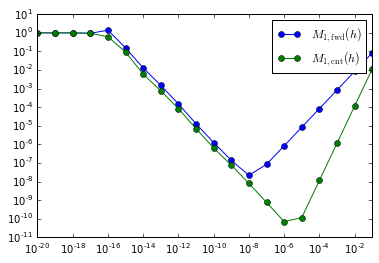

In [98]:
import matplotlib.pyplot as plt

plt.loglog(h_steps, pforwards_err, label=r'$M_{1,{\rm fwd}}(h)$', marker='o')
plt.loglog(h_steps, pcentrals_err, label=r'$M_{1,{\rm cnt}}(h)$', marker='o')
plt.legend()

Из графика видно, что $h_{\rm fwd} = 10^{-8}$, а $h_{\rm cnt} = 10^{-6}$.

# Анализ аппроксимации второй производной

Для второй производной получаем следующую таблицу

In [125]:
display(Markdown('| $h$ |' +' | '.join([str(h) for h in h_steps[:5]]) + ' |\n' + \
'| - |' +'|'.join([' - ' for h in h_steps[:5]]) + '|\n' + \
'| $M_{2,{\\rm cnt}}(h)$ |' +' | '.join(['{:.1e}'.format(e) for e in ppcentrals_err[:5]]) + ' | '))

| $h$ |0.1 | 0.01 | 0.001 | 0.0001 | 1e-05 |
| - | - | - | - | - | - |
| $M_{2,{\rm cnt}}(h)$ |1.9e-02 | 1.9e-04 | 1.9e-06 | 3.2e-08 | 2.9e-06 | 

In [126]:
display(Markdown('| $h$ |' +' | '.join([str(h) for h in h_steps[5:10]]) + ' |\n' + \
'| - |' +'|'.join([' - ' for h in h_steps[5:10]]) + '|\n' + \
'| $M_{2,{\\rm cnt}}(h)$ |' +' | '.join(['{:.1e}'.format(e) for e in ppcentrals_err[5:10]]) + ' | '))

| $h$ |1e-06 | 1e-07 | 1e-08 | 1e-09 | 1e-10 |
| - | - | - | - | - | - |
| $M_{2,{\rm cnt}}(h)$ |2.2e-04 | 2.5e-02 | 2.4e+00 | 2.2e+02 | 2.2e+04 | 

In [127]:
display(Markdown('| $h$ |' +' | '.join([str(h) for h in h_steps[10:15]]) + ' |\n' + \
'| - |' +'|'.join([' - ' for h in h_steps[10:15]]) + '|\n' + \
'| $M_{2,{\\rm cnt}}(h)$ |' +' | '.join(['{:.1e}'.format(e) for e in ppcentrals_err[10:15]]) + ' | '))

| $h$ |1e-11 | 1e-12 | 1e-13 | 1e-14 | 1e-15 |
| - | - | - | - | - | - |
| $M_{2,{\rm cnt}}(h)$ |2.8e+06 | 2.8e+08 | 2.2e+10 | 2.8e+12 | 2.8e+14 | 

In [128]:
display(Markdown('| $h$ |' +' | '.join([str(h) for h in h_steps[15:]]) + ' |\n' + \
'| - |' +'|'.join([' - ' for h in h_steps[15:]]) + '|\n' + \
'| $M_{2,{\\rm cnt}}(h)$ |' +' | '.join(['{:.1e}'.format(e) for e in ppcentrals_err[15:]]) + ' | '))

| $h$ |1e-16 | 1e-17 | 1e-18 | 1e-19 | 1e-20 |
| - | - | - | - | - | - |
| $M_{2,{\rm cnt}}(h)$ |2.8e+16 | 2.8e+17 | 1.7e+00 | 1.7e+00 | 1.7e+00 | 

и график:

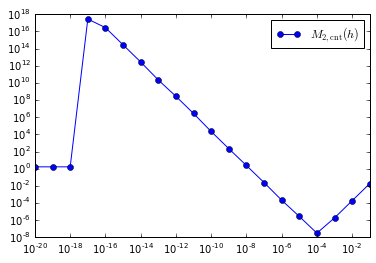

In [129]:
plt.loglog(h_steps, ppcentrals_err, label=r'$M_{2,{\rm cnt}}(h)$', marker='o')
plt.legend()

Из графика видно, что для второй производной $h_{\rm cnt} = 10^{-4}$

# Задание 10. Численное интегрирование

А) Согласно варианту выберите функцию $f(x)$.

Б) Вычислите интеграл $I = \int_{-1}^{1} f(x)dx$ точно (руками).

В) Применяя формулы трапеций и Симпсона, вычислите тот же интеграл приближенно с погрешностью $\varepsilon = 1e-4$ (пользуясь правилом Рунге $\Delta_{2n} \approx \frac{\vert I_N - I_{2N} \vert}{2^3-1} < \varepsilon$).

Г) В каждом случае (для формул трапеций и Симпсона) определите, какое число узлов понадобилось и каковы реальные абсолютные погрешности.

Д) Вычислите тот же интеграл $I = \int_{-1}^{1} f(x)dx$ с той же погрешностью с помощью квадратурной формулы Эрмита (она же - Мелера) $I = \int_{-1}^{1}\frac{F(x)}{\sqrt{1-x^2}} dx \approx \frac{\pi}{n} \sum_{k=0}^{n-1} F(x_k)$, где $F(x) = f(x) \sqrt{1-x^2}$ и $x_k = \cos{\frac{(2k+1)\pi}{2n}}$, $k=0,1,\dots,n-1$.

Е) Определите, какое число узлов понадобилось и какова реальная абсолютная погрешность.

$$ f(x) = 18 \sin{x} + 82 \cos{x} + 12\cdot 2^x - \frac{32}{x^2+1} $$

## Точное значение интеграла

Сначала найдём неопределённый интеграл от $f(x)$:

In [102]:
import sympy as sp

sp.init_printing()

x = sp.Symbol('x')
f = 18*sp.sin(x) + 82 * sp.cos(x) + 12*2**x - (32/(x**2+1))

In [103]:
f

Его значение равно

In [104]:
sp.integrate(f, x)

Интеграл $I$ тогда равен

In [105]:
sp.integrate(f, (x, -1, 1))

или же, приближённо,

In [106]:
I = float(sp.integrate(f, (x, -1, 1)).evalf())
(sp.integrate(f, (x, -1, 1)).evalf())

## Метод трапеций

Аппроксимируем интеграл с помощью метода трапеций:

$I_{N}^{\rm trap} = $

In [107]:
import numpy as np
from scipy.integrate import trapz

def f(x):
    return 18*np.sin(x) + 82 * np.cos(x) + 12*2**x - (32/(x**2+1))

N_trapezoidal = 185
xs_trap = np.linspace(-1, 1, N_trapezoidal)
ys_trap = [f(x) for x in xs_trap]
I_N = trapz(ys_trap, xs_trap)
I_N

Вычислим интеграл с $2N$ узлами:

$I_{2N}^{\rm trap} = $

In [108]:
N_trap2 = 2*N_trapezoidal
xs_trap2 = np.linspace(-1, 1, N_trap2)
ys_trap2 = [f(x) for x in xs_trap2]
I_dN = trapz(ys_trap2, xs_trap2)
I_dN

Правило Рунге даёт следующую оценку абсолютной погрешности $\Delta_{2n} \approx \frac{\vert I_N - I_{2N} \vert}{2^3-1} < \varepsilon$:

In [109]:
err = np.abs(I_N - I_dN)/7.0
(err)

По правилу Рунге для $N=185$ метод трапеций с $2N$ узлами даёт оценку погрешности меньше $1e-4$.
Проверим, чему в действительности равна разность между $I$ и $I_{2N}^{\rm trap}$:

In [110]:
np.abs(I-I_dN)

Абсолютная погрешность не меньше $\varepsilon$, но примерно того же порядка.

## Метод Симпсона

Вычислим теперь тот же интеграл с использованием метода Симпсона:

$I_N^{\rm simp} = $

In [111]:
from scipy.integrate import simps

N_simpson = 25
xs_simpson = np.linspace(-1, 1, N_simpson)
ys_simpson = [f(x) for x in xs_simpson]
I_N_simpson = simps(ys_simpson, xs_simpson)
I_N_simpson

а $ I_{2N}^{\rm simp} = $

In [112]:
N_simpson2 = 2*N_simpson
xs_simpson2 = np.linspace(-1, 1, N_simpson2)
ys_simpson2 = [f(x) for x in xs_simpson2]
I_N_simpson2 = simps(ys_simpson2, xs_simpson2)
I_N_simpson2

Правило Рунге: $\Delta_{2n} \approx \frac{\vert I_N - I_{2N} \vert}{2^3-1} < \varepsilon$

In [113]:
err = np.abs(I_N_simpson - I_N_simpson2)/7.0
(err)

По правилу Рунге для $N=25$ метод Симпсона с $2N$ узлами даёт оценку погрешности меньше $1e-4$.
Проверим, чему в действительности равна разность между $I$ и $I_{2N}^{\rm simp}$:

In [114]:
np.abs(I-I_N_simpson2)

Абсолютная погрешность не меньше $\varepsilon$, но примерно того же порядка.

## Метод Эрмита

Вычислим интеграл с помощью метода Эрмита: $I = \int_{-1}^{1}\frac{F(x)}{\sqrt{1-x^2}} dx \approx \frac{\pi}{n} \sum_{k=0}^{n-1} F(x_k)$, где $F(x) = f(x) \sqrt{1-x^2}$ и $x_k = \cos{\frac{(2k+1)\pi}{2n}}$, $k=0,1,\dots,n-1$.

Для $N$ узлов $I_{N}^{\rm herm}=$

In [115]:
def F(x):
    return f(x)*np.sqrt(1-x**2)

N_herm = 600
xs_herm = np.cos(np.array([2*k+1 for k in range(N_herm)])*np.pi/(2.0*N_herm))
ys_herm = [F(x) for x in xs_herm]
I_N_herm = np.pi * np.sum(ys_herm) / float(N_herm)
I_N_herm

Абсолютная погрешность равна

In [116]:
np.abs(I-I_N_herm)